# Medicaid Expansion and Medicare Quality Measures 

## Part 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_OG = pd.read_csv('CMS_data.csv')

In [3]:
len(df_OG.columns)

158

In [4]:
df = df_OG.drop(columns=['hosp_name_hcr','hospital_name','prvdr_ctrl_type_cd','state',      #duplicates
                      'ipf','oltc','irf','nf','icf',                                     #admin data and segmentation
                      'initial_rpch_or_cah','ipf_provider_number','ipf_provider_number.1',   
                      'snf_provider_number','swing_bed_snf_provider_number','nf_provider_number',
                      'irf_provider_number','irf_provider_number.1','swing_bed_nf_provider_number',
                      'icf_provider_number','subprovider_1','hospital_type','subprovider_1_provider_number',
                      'subprovider_2_provider_number', 'subprovider_iii_indicator','subprovider_2',
                      'labor_and_delivery','intensive_care_unit','cardiac_catheterization','initial_rph_or_cah',
                      'cardiac_catheterization.1','surgical_intensive_care_unit','nursery',
                      'coronary_care_unit','other_special_care','hospice','hospital_adults_&_pediatrics',
                      'burn_intensive_care_unit','cardiac_catheterization.2','critical_access_hosp_hcr',
                      'total_hospital','total_facility','rpch_or_cah','initial_rpch_or_cah','rph_or_cah',
                      'prvdr_ctgry_sbtyp_cd_formatted','hospital_type', 'total',          #col all NaNs
                      'ruca_description', 'street','city','hospital_county','zip','tract' #not useful to analysis  
                     ])

In [5]:
df.shape

(3688, 107)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3688 entries, 0 to 3687
Data columns (total 107 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    hospital_ccn             int64  
 1    state_abbreviation       object 
 2    expanded_2014            object 
 3    ruca                     float64
 4    white_2013               float64
 5    black_2013               float64
 6    asian_2013               float64
 7    hispanic_2013            float64
 8    per_cap_inc_2013         float64
 9    unemployment_2013        float64
 10   bachelor_or_higher_2013  float64
 11   white_2014               float64
 12   black_2014               float64
 13   asian_2014               float64
 14   hispanic_2014            float64
 15   per_cap_inc_2014         float64
 16   unemployment_2014        float64
 17   bachelor_or_higher_2014  float64
 18   white_2015               float64
 19   black_2015               float64
 20   asian_2015               flo

### explain wide to long. formatted more like time-series. turning it into panel data

In [7]:
list(df.columns)

['hospital_ccn',
 'state_abbreviation',
 'expanded_2014',
 'ruca',
 'white_2013',
 'black_2013',
 'asian_2013',
 'hispanic_2013',
 'per_cap_inc_2013',
 'unemployment_2013',
 'bachelor_or_higher_2013',
 'white_2014',
 'black_2014',
 'asian_2014',
 'hispanic_2014',
 'per_cap_inc_2014',
 'unemployment_2014',
 'bachelor_or_higher_2014',
 'white_2015',
 'black_2015',
 'asian_2015',
 'hispanic_2015',
 'per_cap_inc_2015',
 'unemployment_2015',
 'bachelor_or_higher_2015',
 'white_2016',
 'black_2016',
 'asian_2016',
 'hispanic_2016',
 'per_cap_inc_2016',
 'unemployment_2016',
 'bachelor_or_higher_2016',
 'white_2017',
 'black_2017',
 'asian_2017',
 'hispanic_2017',
 'per_cap_inc_2017',
 'unemployment_2017',
 'bachelor_or_higher_2017',
 'white_2018',
 'black_2018',
 'asian_2018',
 'hispanic_2018',
 'per_cap_inc_2018',
 'unemployment_2018',
 'bachelor_or_higher_2018',
 'white_2019',
 'black_2019',
 'asian_2019',
 'hispanic_2019',
 'per_cap_inc_2019',
 'unemployment_2019',
 'bachelor_or_higher_20

In [8]:
# first turn wide to long
# keep underscore at the end to work
df_panel = pd.wide_to_long(df, stubnames=['err_for_pneumonia_','err_for_ami_','err_for_hf_',
                                          'err_for_hka_','err_for_copd_','err_for_cabg_',
                                          'white_','black_','asian_','hispanic_',
                                          'per_cap_inc_','unemployment_','bachelor_or_higher_'],
                           i='hospital_ccn', j='year')

In [9]:
df_panel = df_panel.reset_index()

In [10]:
df_panel

,hospital_ccn,year,expanded_2014,cms_region_code,ruca,ownership_nonprofit,beds,ownership_government,ownership_forprofit,state_abbreviation,...,err_for_hka_,err_for_copd_,err_for_cabg_,white_,black_,asian_,hispanic_,per_cap_inc_,unemployment_,bachelor_or_higher_
0,10001,2013,False,4.0,1.0,0.0,332,1.0,0.0,AL,...,NaN,NaN,NaN,0.977536,0.911785,0.050931,0.018678,18656.0,0.147736,0.289999
1,10001,2014,False,4.0,1.0,0.0,332,1.0,0.0,AL,...,NaN,NaN,NaN,0.928280,0.952723,0.054908,0.025750,18856.0,0.162697,0.296953
2,10001,2015,False,4.0,1.0,0.0,332,1.0,0.0,AL,...,1.034180,1.079999,NaN,0.852502,1.012446,0.072489,0.026774,19865.5,0.171721,0.301049
3,10001,2016,False,4.0,1.0,0.0,332,1.0,0.0,AL,...,1.088448,1.057231,NaN,0.822522,1.044961,0.079803,0.023791,21631.0,0.143755,0.334382
4,10001,2017,False,4.0,1.0,0.0,332,1.0,0.0,AL,...,1.119751,1.045480,1.061759,0.845727,1.011237,0.101561,0.033518,23688.5,0.137640,0.360459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33187,670899,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33188,670899,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33189,670899,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33190,670899,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
list(df_panel.columns)

['hospital_ccn',
 'year',
 'expanded_2014',
 'cms_region_code',
 'ruca',
 'ownership_nonprofit',
 'beds',
 'ownership_government',
 'ownership_forprofit',
 'state_abbreviation',
 'teaching_hospital',
 'snf',
 'cah',
 'err_for_pneumonia_',
 'err_for_ami_',
 'err_for_hf_',
 'err_for_hka_',
 'err_for_copd_',
 'err_for_cabg_',
 'white_',
 'black_',
 'asian_',
 'hispanic_',
 'per_cap_inc_',
 'unemployment_',
 'bachelor_or_higher_']

In [12]:
column_names = ['hospital_ccn','year','expanded_2014',
                'state_abbreviation','cms_region_code','ruca',
                'snf','cah','teaching_hospital','beds',
                'ownership_forprofit','ownership_government','ownership_nonprofit',
                'per_cap_inc_','unemployment_','bachelor_or_higher_',
                'white_','black_','asian_','hispanic_',
                'err_for_pneumonia_','err_for_ami_','err_for_hf_',
                'err_for_hka_','err_for_copd_','err_for_cabg_']

In [13]:
df_panel = df_panel.reindex(columns=column_names)

### Addressing Missing Values and Data Types

In [14]:
#same 26 columns after re-ordering
df_panel.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33192 entries, 0 to 33191
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hospital_ccn          33192 non-null  int64  
 1   year                  33192 non-null  int64  
 2   expanded_2014         30330 non-null  object 
 3   state_abbreviation    30411 non-null  object 
 4   cms_region_code       27387 non-null  float64
 5   ruca                  28809 non-null  float64
 6   snf                   3501 non-null   float64
 7   cah                   33192 non-null  int64  
 8   teaching_hospital     29079 non-null  float64
 9   beds                  29151 non-null  object 
 10  ownership_forprofit   29151 non-null  float64
 11  ownership_government  29151 non-null  float64
 12  ownership_nonprofit   29151 non-null  float64
 13  per_cap_inc_          22412 non-null  float64
 14  unemployment_         22412 non-null  float64
 15  bachelor_or_higher_

#### First dealing with object datatypes: list them

In [15]:
df_panel['state_abbreviation'].value_counts()

TX    2898
CA    2709
FL    1539
NY    1404
PA    1377
OH    1179
IL    1143
GA     918
MI     864
LA     864
TN     837
IN     783
OK     783
AL     783
NC     774
VA     720
MO     648
WI     612
KY     585
AZ     576
NJ     576
MS     558
MA     522
SC     486
KS     477
CO     468
MN     459
WA     441
AR     423
MD     414
NM     315
OR     306
IA     306
UT     297
CT     288
WV     270
NE     234
NV     225
SD     198
ME     153
ID     135
MT     126
NH     117
HI     108
WY     108
RI      90
AK      72
ND      72
DC      63
DE      54
VT      54
Name: state_abbreviation, dtype: int64

comment on states. no odd value

In [16]:
df['state_abbreviation'].isna().sum()

309

In [17]:
df_OG['state'].isna().sum()

318

In [18]:
checking_states = df_OG[
    (df_OG['state'].isnull())|
    (df_OG['state_abbreviation'].isnull())
                                           ]

checking_states.shape

(318, 158)

In [19]:
checking_states.query('`state`.isnull()&`state_abbreviation`.isnull()' , engine='python').shape

(309, 158)

all 309 state abbreviations that are null don't have corresponding states

looking at original dataset. Missing states. thus missing we can safely drop where states are missing

In [20]:
df_panel.shape

(33192, 26)

In [21]:
df_panel = df_panel[df_panel['state_abbreviation'].notna()]

In [22]:
df_panel.shape

(30411, 26)

#### next check expanded. see ifdealt with missing since expansion isbased on knowingstate

In [23]:
df_panel['expanded_2014'].isna().sum()

81

In [24]:
checking_expansion = df_panel[
    (df_panel['expanded_2014'].isnull())
                                               ]
checking_expansion['state_abbreviation'].count()

81

In [25]:
checking_expansion['state_abbreviation'].nunique()

7

In [26]:
checking_expansion['state_abbreviation'].value_counts()

CA    18
NC    18
AR     9
AZ     9
UT     9
WI     9
NV     9
Name: state_abbreviation, dtype: int64

In [27]:
#
expanded_states = df_panel.query('`expanded_2014` == True')
expanded_states = list(expanded_states['state_abbreviation'].unique())

In [28]:
#
notexpanded_states = df_panel.query('`expanded_2014` == False')
notexpanded_states = list(notexpanded_states['state_abbreviation'].unique())

In [29]:
df_panel['expanded_2014'].value_counts()

False    16344
True     13986
Name: expanded_2014, dtype: int64

In [30]:
df_panel['expanded_2014'].isna().sum()

81

Explain the drop

In [31]:
df_panel.shape

(30411, 26)

In [32]:
df_panel = df_panel[df_panel['expanded_2014'].notna()]

In [33]:
df_panel.shape

(30330, 26)

#### next doing beds

In [34]:
df_panel['beds'].value_counts()

49     666
40     324
48     315
30     234
47     216
      ... 
379      9
356      9
819      9
498      9
525      9
Name: beds, Length: 655, dtype: int64

In [35]:
df_panel['beds'] = pd.to_numeric(df_panel['beds'], errors='coerce') #change error to NaN

In [36]:
df_panel.describe().loc[['count','min','max']]

,hospital_ccn,year,cms_region_code,ruca,snf,cah,teaching_hospital,beds,ownership_forprofit,ownership_government,...,white_,black_,asian_,hispanic_,err_for_pneumonia_,err_for_ami_,err_for_hf_,err_for_hka_,err_for_copd_,err_for_cabg_
count,30330.0,30330.0,26955.0,28314.0,3456.0,30330.0,28530.0,28539.0,28584.0,28584.0,...,22412.000000,22412.000000,22412.000000,22412.000000,26827.000000,22398.000000,26528.000000,18577.000000,20615.000000,5572.0000
min,10001.0,2013.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.759052,0.666265,0.699749,0.514187,0.768887,0.6504
max,670124.0,2021.0,10.0,99.0,769.0,1.0,1.0,2812.0,1.0,1.0,...,97.571702,25.112696,1.678903,33.839833,1.454900,1.439100,1.456339,2.337800,1.354357,1.8144


<AxesSubplot:>

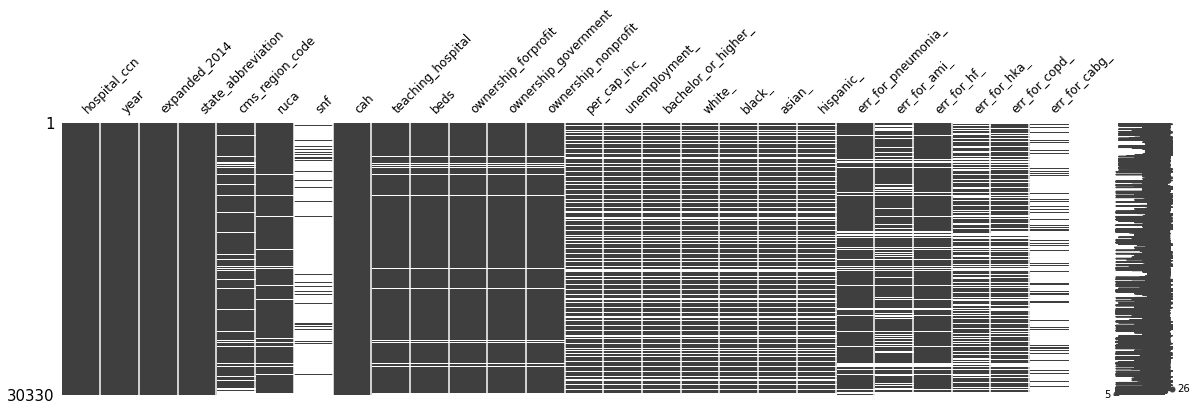

In [37]:
import missingno as msno

msno.matrix(df_panel,figsize=(20,5), fontsize=12)

<AxesSubplot:>

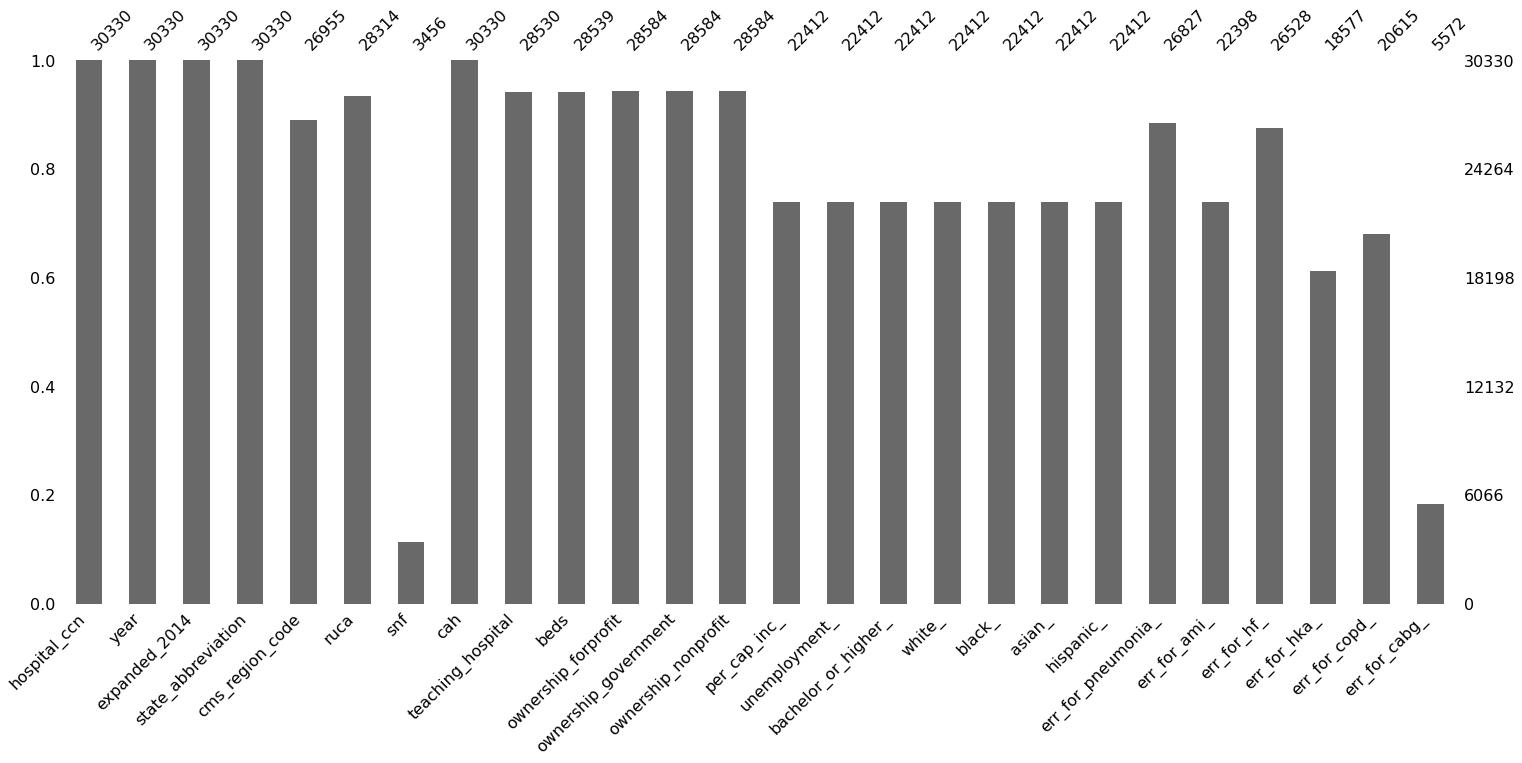

In [38]:
msno.bar(df_panel)

impute nulls with pipeline for regression

Summarize

range 
year 2013-2021
cms region code 1-10 (LOOK IT UP)


string
binary float ownership_forprofit	ownership_government	ownership_nonprofit
binary boolean
consistent missing in demograohic info. 

'per_cap_inc_','unemployment_','bachelor_or_higher_',
                'white_','black_','asian_','hispanic_',
 
I need to allot more time for cleaning

In [39]:
df_panel = df_panel.drop(columns=['snf'])

In [40]:
# confirm one less column 26-1
df_panel.shape

(30330, 25)

In [41]:
df_panel.ndim

2

### EDA

In [42]:
df_panel['hospital_ccn'].nunique()

3370

In [43]:
# categorical features
cat_df = df_panel[['hospital_ccn','year','state_abbreviation','expanded_2014','cms_region_code','cah','teaching_hospital',
               'ownership_forprofit','ownership_government','ownership_nonprofit']]

cat = ['state_abbreviation','expanded_2014','cms_region_code','cah','teaching_hospital',
               'ownership_forprofit','ownership_government','ownership_nonprofit']

In [44]:
# numerical features
num_df = df_panel[['hospital_ccn','expanded_2014','year','ruca','beds',
               'unemployment_','bachelor_or_higher_', 'per_cap_inc_',
               'white_','black_','asian_','hispanic_',
               'err_for_pneumonia_','err_for_ami_','err_for_hf_',
               'err_for_hka_','err_for_copd_','err_for_cabg_']]

num = ['year','ruca','beds',
               'unemployment_','bachelor_or_higher_', 'per_cap_inc_',
               'white_','black_','asian_','hispanic_',
               'err_for_pneumonia_','err_for_ami_','err_for_hf_',
               'err_for_hka_','err_for_copd_','err_for_cabg_']


In [45]:
# dependent variable
outcome_df = df_panel[['hospital_ccn','year','expanded_2014']]
outcome = ['expanded_2014']

# metrics
errs_df = df_panel[['hospital_ccn','expanded_2014','year','err_for_pneumonia_','err_for_ami_','err_for_hf_','err_for_hka_','err_for_copd_','err_for_cabg_']]
errs = ['err_for_pneumonia_','err_for_ami_','err_for_hf_','err_for_hka_','err_for_copd_','err_for_cabg_']


#demographic
demo_df = df_panel[['hospital_ccn','expanded_2014','year','unemployment_','bachelor_or_higher_', 'per_cap_inc_','white_','black_','asian_','hispanic_']]
demo = ['unemployment_','bachelor_or_higher_', 'per_cap_inc_','white_','black_','asian_','hispanic_']

statistic significance ami vs hf

In [46]:
pivot_ami = (
    (df_panel.pivot_table(index='expanded_2014', columns='year', values='err_for_ami_', aggfunc='median'))
    .round(4)
)

pivot_ami

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
expanded_2014,,,,,,,,,
False,0.9914,0.9951,0.9958,0.9952,0.9977,0.9969,0.9966,0.9974,0.9963
True,1.0084,1.0045,1.0017,1.0028,1.0025,0.9993,0.9989,0.9986,0.9980


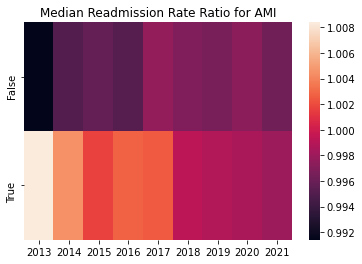

In [48]:
import seaborn as sns

sns.heatmap(pivot_ami)
plt.xlabel('')
plt.ylabel('')
plt.title('Median Readmission Rate Ratio for AMI')
plt.show()

In [49]:
pivot_hf = (
    (df_panel.pivot_table(index='expanded_2014', columns='year', values='err_for_hf_', aggfunc='median'))
    .round(4)
)

pivot_hf

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
expanded_2014,,,,,,,,,
False,0.9890,0.9912,0.9924,0.9916,0.9926,0.9958,0.9946,0.9966,0.9961
True,1.0061,1.0076,1.0052,1.0061,1.0035,1.0024,1.0026,1.0020,1.0047


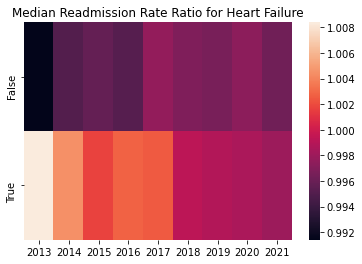

In [50]:
sns.heatmap(pivot_ami)
plt.xlabel('')
plt.ylabel('')
plt.title('Median Readmission Rate Ratio for Heart Failure')
plt.show()

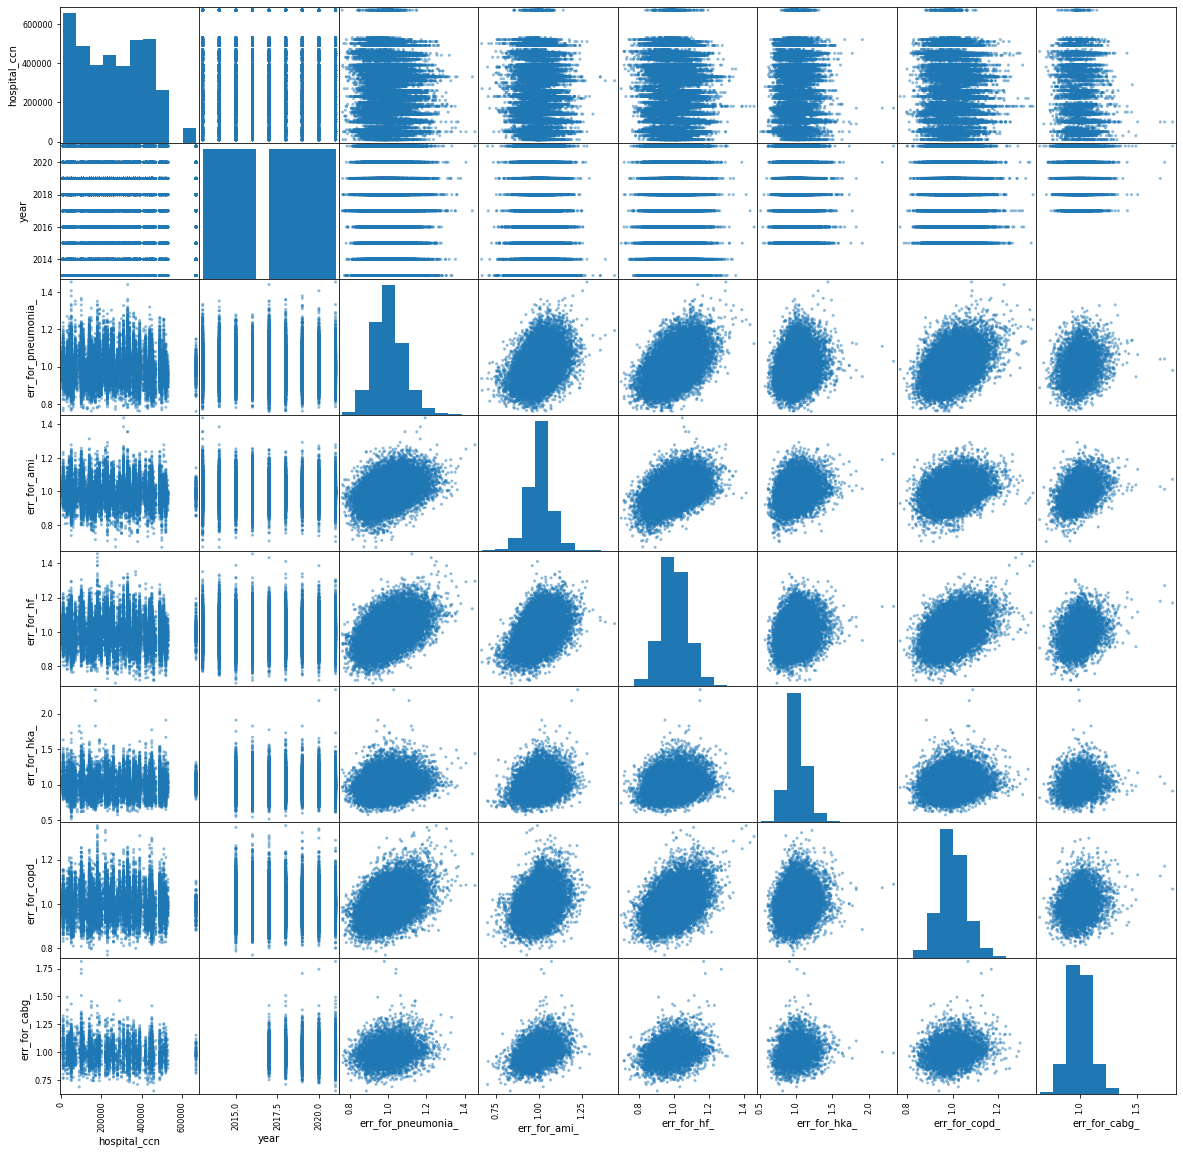

In [57]:
pd.plotting.scatter_matrix(errs_df, figsize=(20,20))
plt.show()

In [52]:
corr_matrix = df_panel[num].corr().round(2)
corr_matrix

,year,ruca,beds,unemployment_,bachelor_or_higher_,per_cap_inc_,white_,black_,asian_,hispanic_,err_for_pneumonia_,err_for_ami_,err_for_hf_,err_for_hka_,err_for_copd_,err_for_cabg_
year,1.00,0.00,0.00,-0.08,0.02,0.13,-0.00,-0.00,0.02,0.01,0.00,-0.01,0.00,0.00,-0.00,0.01
ruca,0.00,1.00,-0.12,0.11,0.06,-0.11,0.09,0.08,-0.04,0.03,-0.03,-0.02,-0.01,-0.01,-0.03,-0.00
beds,0.00,-0.12,1.00,-0.08,-0.03,0.11,-0.11,-0.05,0.13,-0.05,0.09,0.06,-0.00,0.03,0.05,-0.05
unemployment_,-0.08,0.11,-0.08,1.00,0.88,-0.19,0.87,0.78,0.30,0.69,-0.01,-0.04,0.02,-0.00,-0.02,-0.01
bachelor_or_higher_,0.02,0.06,-0.03,0.88,1.00,0.03,0.95,0.56,0.42,0.82,-0.03,-0.04,-0.01,-0.04,-0.03,-0.05
per_cap_inc_,0.13,-0.11,0.11,-0.19,0.03,1.00,-0.10,-0.16,0.11,-0.08,-0.03,-0.00,-0.04,-0.05,-0.00,-0.03
white_,-0.00,0.09,-0.11,0.87,0.95,-0.10,1.00,0.48,0.29,0.91,-0.04,-0.05,-0.01,-0.03,-0.03,-0.02
black_,-0.00,0.08,-0.05,0.78,0.56,-0.16,0.48,1.00,0.13,0.23,0.05,0.02,0.05,0.06,0.00,0.00
asian_,0.02,-0.04,0.13,0.30,0.42,0.11,0.29,0.13,1.00,0.31,0.05,0.04,0.04,-0.06,0.03,-0.04
hispanic_,0.01,0.03,-0.05,0.69,0.82,-0.08,0.91,0.23,0.31,1.00,-0.03,-0.01,-0.01,-0.02,-0.03,0.02


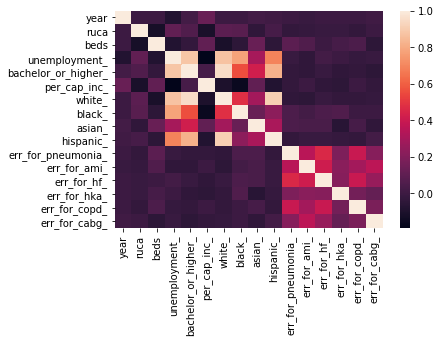

In [53]:
sns.heatmap(corr_matrix, annot=False)
plt.show()

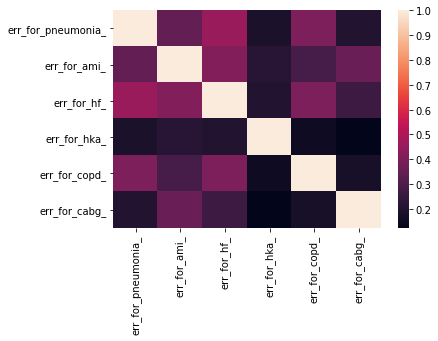

In [54]:
corr_matrix = df_panel[errs].corr().round(5)
sns.heatmap(corr_matrix, annot=False)
plt.show()

In [55]:
df_panel.groupby(['year','expanded_2014'])[errs].mean().round(3).sort_index()

err_for_pneumonia_  err_for_ami_  err_for_hf_  \
year expanded_2014                                                  
2013 False                       0.993         0.993        0.993   
     True                        1.011         1.010        1.009   
2014 False                       0.993         0.996        0.994   
     True                        1.011         1.006        1.009   
2015 False                       0.993         0.997        0.994   
     True                        1.011         1.006        1.009   
2016 False                       0.996         1.000        0.995   
     True                        1.007         1.005        1.009   
2017 False                       0.994         1.000        0.995   
     True                        1.011         1.004        1.008   
2018 False                       0.995         1.000        0.997   
     True                        1.009         1.002        1.007   
2019 False                       0.995         0.999        0.997   
     True                        1.009         1.003        1.006   
2020 False                       0.996         0.999        0.999   
     True                        1.008         1.003        1.006   
2021 False                       0.997         0.999        0.998   
     True                        1.006         1.002        1.006   

                    err_for_hka_  err_for_copd_  err_for_cabg_  
year expanded_2014                                              
2013 False                   NaN            NaN            NaN  
     True                    NaN            NaN            NaN  
2014 False                   NaN            NaN            NaN  
     True                    NaN            NaN            NaN  
2015 False                 1.008          0.993            NaN  
     True                  1.007          1.011            NaN  
2016 False                 1.011          0.994            NaN  
     True                  1.001          1.010            NaN  
2017 False                 1.014          0.993          0.999  
     True                  0.997          1.011          1.004  
2018 False                 1.015          0.996          1.001  
     True                  1.000          1.007          1.006  
2019 False                 1.015          0.997          1.004  
     True                  0.997          1.007          1.005  
2020 False                 1.015          0.998          1.006  
     True                  0.999          1.005          1.002  
2021 False                 1.016          0.997          1.003  
     True                  0.999          1.005          1.004

In [56]:
df_panel.groupby(['year','expanded_2014'])[demo].mean().round(3).sort_index()

unemployment_  bachelor_or_higher_  per_cap_inc_  white_  \
year expanded_2014                                                             
2013 False                  0.486                0.602     25317.524   3.566   
     True                   0.292                0.443     27970.085   1.976   
2014 False                  0.466                0.613     25705.126   3.562   
     True                   0.279                0.451     28342.515   1.971   
2015 False                  0.433                0.621     25966.877   3.555   
     True                   0.256                0.460     28679.787   1.968   
2016 False                  0.401                0.634     26700.533   3.547   
     True                   0.232                0.470     29520.315   1.965   
2017 False                  0.364                0.649     27804.398   3.541   
     True                   0.208                0.479     30816.412   1.960   
2018 False                  0.333                0.662     28956.924   3.531   
     True                   0.190                0.490     32269.652   1.955   
2019 False                  0.304                0.675     30090.353   3.534   
     True                   0.175                0.499     33785.130   1.948   
2020 False                    NaN                  NaN           NaN     NaN   
     True                     NaN                  NaN           NaN     NaN   
2021 False                    NaN                  NaN           NaN     NaN   
     True                     NaN                  NaN           NaN     NaN   

                    black_  asian_  hispanic_  
year expanded_2014                             
2013 False           0.875   0.056      0.784  
     True            0.271   0.107      0.388  
2014 False           0.876   0.059      0.793  
     True            0.270   0.110      0.392  
2015 False           0.876   0.060      0.803  
     True            0.269   0.111      0.397  
2016 False           0.874   0.062      0.813  
     True            0.269   0.112      0.402  
2017 False           0.872   0.063      0.825  
     True            0.269   0.115      0.406  
2018 False           0.876   0.064      0.834  
     True            0.270   0.116      0.409  
2019 False           0.874   0.063      0.844  
     True            0.271   0.117      0.415  
2020 False             NaN     NaN        NaN  
     True              NaN     NaN        NaN  
2021 False             NaN     NaN        NaN  
     True              NaN     NaN        NaN